In [1]:
from visualization.tanglegram import *
from IPython.display import display,Image
from api_tools import sort_tree
from ete3 import Tree

In [2]:
st = "/mnt/home-backup/thliao/cyano/analysis/nfixer/phylogenomic/iqtree/20220317.newick"
gt = "/mnt/home-backup/thliao/cyano/analysis/nfixer/gene_phylogeny/concat_scheme1/trees/DEKWXNB_final.newick"

In [62]:
tre1 = sort_tree(Tree(st,3))
tre2 = sort_tree(Tree(gt,3))


In [85]:
tre1.convert_to_ultrametric()
tre2.convert_to_ultrametric()
t1 = tree_vis(tre1)
t2 = tree_vis(tre2)

In [12]:
leaves1 = [_.name for _ in t1.tree_obj.get_terminals()]
leaves2 = [_.name for _ in t2.tree_obj.get_terminals()]
l2r = defaultdict(list)
for l in leaves1:
    l2r[l] = [_ for _ in leaves2 if _.split('_operon')[0]==l ]

In [24]:
gt_name2color = parse_color_scheme_files('/mnt/home-backup/thliao/cyano/analysis/nfixer/gene_phylogeny/concat_scheme1/itol/Major_Nfixer_Each.txt')

c2group_name = {}
for row in [_ for _ in open('/mnt/home-backup/thliao/cyano/analysis/nfixer/gene_phylogeny/concat_scheme1/itol/Major_Nfixer_Each.txt').read().strip().split('\n') if _.startswith('GC')]:
    c2group_name[row.split(',')[-2]] = row.split(',')[-1]
    

In [86]:
fig,left_tre,right_tre = tanglegram(t1,t2,relationship_l2r=l2r,r_color_setting=gt_name2color)

drawing dendrograms
adding color


In [87]:
for d in fig.data:
    if d['mode']=='lines' and d['xaxis']=='x2':
        c = d['line']['color']
        if c in c2group_name:
            d['name'] = c2group_name[c]
        if c =='#000000':
            d['opacity'] = 0.2

In [89]:
fig.layout.width = 1500
fig.layout.height = 2500
fig.write_image('./tmp.png')

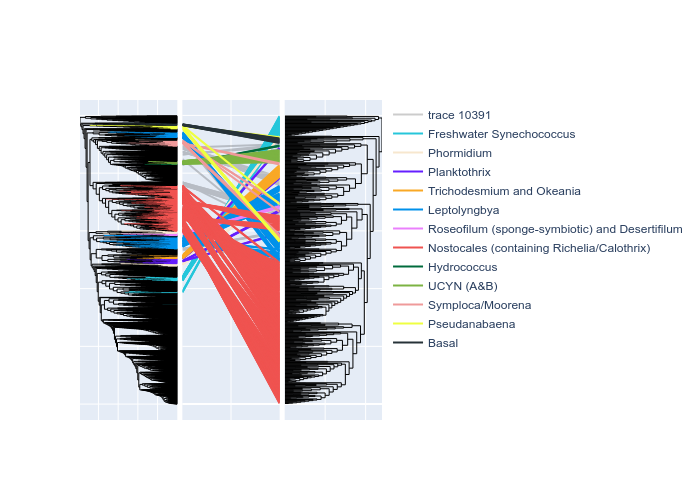

In [88]:
display(Image(fig.to_image()))